In [1]:
from UCLSE.dyna_q.Experiment1a import Experiment
import numpy as np
import pandas as pd
import visdom

In [2]:
vis=visdom.Visdom(port=8097)

In [3]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':5000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':True,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-2}

In [4]:
dyna_config={
	"double_q_model": False,
	"batch_size": 128,
	"learning_rate": 5e-3,
	"exploration": {
		"type": "exponential",
		"init_epsilon": 0.8,
		"min_epsilon": 0.05,
		"decay_steps": 100000,
		"decay_eps": 0.99,
        "choice":'least_bonus'
	},
	"memory": {
		"memory_capacity": 1000000,
		"prioritized": False,
        "tabular memory":True,
        
	},
	"discount": 0.99,
	"target_update_freq": 100,
	"first_update": 200,
	"modify_reward": False,
    "learn":'Q',
    'double_q_model':True
    #"clipping":1
    
}

In [5]:
agent_kwargs={'CVAE':True,'latent_dim':2,'recon_weight':0.1,'kl_thresh':0.01,
                   'env_H1Size':32,'env_H2Size':16,'Q_H1Size':32,'Q_H2Size':16,
                   'doneModel':None,'rewardModel':None,'loss_func':None}

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
92    24   16  ZIP7_24_0 1     NaN  ZIP7
      25   19  ZIP1_25_0 1     NaN  ZIP1
94    3    0   ZIP0_3_0  1     NaN  ZIP0
      18   12  HBL5_18_0 1     NaN  HBL5
96    13   7   ZIP5_13_0 1     NaN  ZIP5
98    5    2   ZIP4_5_0  1     NaN  ZIP4
      11   6   HBL9_11_1 1     NaN  HBL9
101   14   9   ZIP8_14_0 1     NaN  ZIP8
      23   14  CON3_23_0 1     NaN  CON3
105   3    1   ZIP0_3_1  1    ZIP0   NaN
      5    3   ZIP4_5_1  1    ZIP4   NaN
      13   8   ZIP5_13_1 1    ZIP5   NaN
      23   15  CON3_23_1 1    CON3   NaN
106   14   10  ZIP8_14_1 1    ZIP8   NaN
110   17   11  HBL3_17_0 1    HBL3   NaN
      19   13  HBL8_19_1 1    HBL8   NaN
      25   20  ZIP1_25_1 1    ZIP1   NaN
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                    

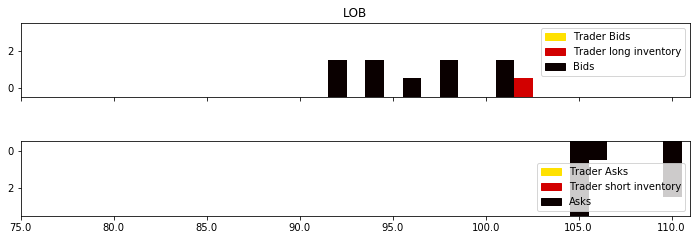

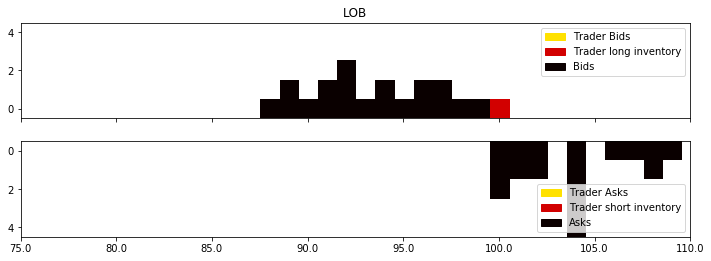

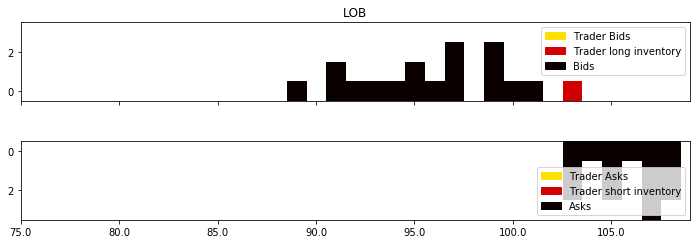

In [6]:
experiment=Experiment(trader_pref_kwargs,timer_kwargs,
           price_sequence_kwargs,noise_kwargs,
           messenger_kwargs,env_kwargs,trader_kwargs,
           lobenv_kwargs,dyna_config,agent_kwargs,visdom=vis)

In [7]:
experiment.new_train_setup(MaxEpisodes=1001,planning_steps=1,lookback=50,thresh=5,planning=True,graph=True)

In [8]:
experiment.train(MaxEpisodes=20000,start_episode=experiment.episode)

Planning is True, double Q model is True, tabular memory is True
Dyna-Q - EXP: 1 | Ep: 21 | timestep: 3 | Ep_r:  -1.8 Profit: -3 Avg loss:-1.2913333333333334
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 41 | timestep: 33 | Ep_r:  -0.8719999999999999 Profit: 0 Avg loss:-0.9411219512195124
Dyna-Q - EXP: 1 | Ep: 61 | timestep: 100 | Ep_r:  -0.9119999999999995 Profit: 1 Avg loss:-0.8385600000000001
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 81 | timestep: 100 | Ep_r:  -0.5999999999999996 Profit: 2 Avg loss:-0.8108400000000008
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 101 | timestep: 23 | Ep_r:  -4.062 Profit: -2 Avg loss:-1.0458800000000006
Dyna-Q - EXP: 1 | Ep: 121 | timestep: 21 | Ep_r:  -1.02 Profit: 0 Avg loss:-1.14532
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 141 | times

Dyna-Q - EXP: 1 | Ep: 1021 | timestep: 100 | Ep_r:  5.139999999999992 Profit: 5 Avg loss:-0.7812000000000006
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1041 | timestep: 59 | Ep_r:  -2.968 Profit: -2 Avg loss:-0.9500800000000001
Dyna-Q - EXP: 1 | Ep: 1061 | timestep: 35 | Ep_r:  -0.964 Profit: -1 Avg loss:-0.2924000000000005
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1081 | timestep: 49 | Ep_r:  -0.8159999999999998 Profit: 0 Avg loss:-0.1456000000000005


KeyboardInterrupt: 

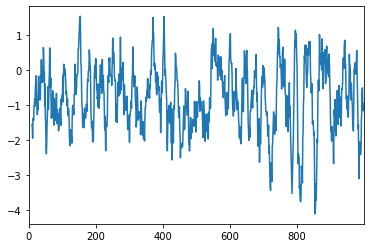

In [11]:
rl=pd.DataFrame(np.array(experiment.rwd_dyna))#.rolling(10).mean().plot()
rl.columns=['reward','time']
#rl=rl.set_index('time')
rl.rolling(10).reward.mean().plot()

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    5    1   ZIP2_5_0  1     NaN  ZIP2
90    31   21  HBL5_31_1 1     NaN  HBL5
93    19   14  HBL3_19_1 1     NaN  HBL3
      25   18  ZIP3_25_0 1     NaN  ZIP3
94    8    4   ZIP0_8_0  1     NaN  ZIP0
96    11   7   ZIP7_11_0 1     NaN  ZIP7
      26   20  HBL4_26_0 1     NaN  HBL4
      32   22  ZIP8_32_2 1     NaN  ZIP8
      36   24  CON8_36_0 1     NaN  CON8
      37   26  CON7_37_0 1     NaN  CON7
      39   29  CON4_39_0 1     NaN  CON4
99    42   32  HBL1_42_0 1     NaN  HBL1
100   37   27  CON7_37_1 1    CON7   NaN
      39   30  CON4_39_1 1    CON4   NaN
102   8    5   ZIP0_8_1  1    ZIP0   NaN
103   11   8   ZIP7_11_1 1    ZIP7   NaN
104   25   19  ZIP3_25_1 1    ZIP3   NaN
105   15   11  HBL2_15_0 1    HBL2   NaN
      24   17  HBL8_24_0 1    HBL8   NaN
107   32   23  ZIP

adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 171, | timestep:  20 | Ep_r: 1.8800000000000001|profit:0 start:30|end:50
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL t

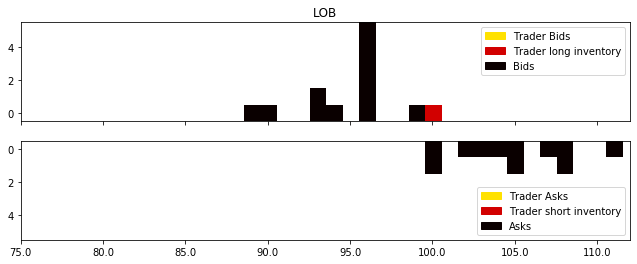

In [12]:
experiment.test_setup(MaxEpisodes=250)

In [13]:
experiment.lobenv_test.trader.balance

0

In [14]:
experiment.rwd_test

[(26, 35, 9, 0, 3.624, 0),
 (26, 59, 42, 1, -1.8719999999999999, 0),
 (66, 100, 76, 2, 0.8320000000000003, 0),
 (59, 79, 96, 3, -5.1240000000000006, 0),
 (44, 89, 141, 4, 0.17600000000000016, 0),
 (26, 34, 149, 5, -0.07199999999999984, 0),
 (26, 45, 168, 6, -7.828, 0),
 (35, 67, 200, 7, -0.8799999999999999, 0),
 (28, 65, 237, 8, -0.006000000000000005, 0),
 (22, 39, 254, 9, -0.1359999999999999, 0),
 (79, 82, 257, 10, -6.042, 0),
 (35, 54, 276, 11, -0.07799999999999985, 0),
 (25, 38, 289, 12, 2.7520000000000002, 0),
 (46, 64, 307, 13, -0.08199999999999985, 0),
 (43, 66, 330, 14, -0.06199999999999983, 0),
 (29, 41, 342, 15, -0.10599999999999987, 0),
 (34, 47, 355, 16, 3.652, 0),
 (38, 54, 371, 17, 3.664, 0),
 (39, 59, 391, 18, -2.1239999999999997, 0),
 (106, 110, 395, 19, -3.088, 0),
 (91, 109, 413, 20, -3.932, 0),
 (36, 53, 430, 21, -0.1359999999999999, 0),
 (40, 64, 454, 22, -1.008, 0),
 (51, 71, 474, 23, 0.07600000000000029, 0),
 (33, 56, 497, 24, -2.0620000000000003, 0),
 (31, 68, 534

In [15]:
experiment.lobenv_test.trader.blotter

{'RL_40_1': [{'tid': 'RL',
   'otype': 'Bid',
   'client_price': 100,
   'order_qty': 1,
   'order_issue_time': 40,
   'accession_time': 40,
   'qid': 45.0,
   'oid': 'RL_40_1',
   'exec_time': 40,
   'exec_qty': 1,
   'exec_price': 100,
   'profit': 0,
   'improvement': 0,
   'BS': 'Buy',
   'status': 'complete'}]}